In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
df = pd.read_excel('../data/egatur_murcia.xlsx', engine='openpyxl')

In [3]:
df.head()

,AÑO,MES,TIPO_VISITANTE,CCAA_DESTINO,PERNOCTACIONES,GASTO_TOTAL
0,2015,10,Turista no residente (no tránsito),Región de Murcia,1454,86922705.15
1,2015,11,Turista no residente (no tránsito),Región de Murcia,949,17028874.60
2,2015,12,Turista no residente (no tránsito),Región de Murcia,1261,19794668.22
3,2016,1,Turista no residente (no tránsito),Región de Murcia,1431,34246221.38
4,2016,2,Turista no residente (no tránsito),Región de Murcia,912,30048401.91


In [4]:
df.tail()

,AÑO,MES,TIPO_VISITANTE,CCAA_DESTINO,PERNOCTACIONES,GASTO_TOTAL
92,2023,8,Turista no residente (no tránsito),Región de Murcia,2325,1.480347e+08
93,2023,9,Turista no residente (no tránsito),Región de Murcia,1875,1.363972e+08
94,2023,10,Turista no residente (no tránsito),Región de Murcia,971,1.161085e+08
95,2023,11,Turista no residente (no tránsito),Región de Murcia,1287,8.408243e+07
96,2023,12,Turista no residente (no tránsito),Región de Murcia,1231,1.018851e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AÑO             97 non-null     int64  
 1   MES             97 non-null     int64  
 2   TIPO_VISITANTE  97 non-null     object 
 3   CCAA_DESTINO    97 non-null     object 
 4   PERNOCTACIONES  97 non-null     int64  
 5   GASTO_TOTAL     97 non-null     float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.7+ KB


In [ ]:
# dado que el dataset ya fue filtrado en origen para que sólo aparezca la región de murcia, vamos a dropear columnas innecesarias

In [8]:
df = df.drop(['CCAA_DESTINO', 'TIPO_VISITANTE'], axis=1)

In [ ]:
# vamos analizar los datos de gasto por cada pernoctación

In [6]:
df['gasto_por_pernoctacion'] = df['GASTO_TOTAL'] / df['PERNOCTACIONES']

print(df.head())

    AÑO  MES                      TIPO_VISITANTE      CCAA_DESTINO  \
0  2015   10  Turista no residente (no tránsito)  Región de Murcia   
1  2015   11  Turista no residente (no tránsito)  Región de Murcia   
2  2015   12  Turista no residente (no tránsito)  Región de Murcia   
3  2016    1  Turista no residente (no tránsito)  Región de Murcia   
4  2016    2  Turista no residente (no tránsito)  Región de Murcia   

   PERNOCTACIONES  GASTO_TOTAL  gasto_por_pernoctacion  
0            1454  86922705.15            59781.777957  
1             949  17028874.60            17944.019600  
2            1261  19794668.22            15697.595734  
3            1431  34246221.38            23931.671125  
4             912  30048401.91            32947.809112  


In [ ]:
# en un ejercicio anterior (gatur_esp_v2) vimos que en la serie temporal había datos faltantes en los años.
# vamos a realizar la operación para ver si faltan datos

In [9]:
# Para ver los meses específicos presentes para cada año
meses_por_año = df.groupby('AÑO')['MES'].unique().apply(sorted)  # Aplica sorted para ordenar los meses

print(meses_por_año)

AÑO
2015                               [10, 11, 12]
2016    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2017    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2018    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2019    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2020          [1, 2, 3, 6, 7, 8, 9, 10, 11, 12]
2021    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2022    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2023    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Name: MES, dtype: object


In [ ]:
# efectivamente, faltan los meses 4 y 5 en 2020, vamos a crearlos

In [ ]:
# Combinamos ambas columnas como string para luego crear los valores faltantes más facilmente
df['FECHA'] = df['AÑO'].astype(str) + '-' + df['MES'].astype(str).str.zfill(2)

# eliminamos las columnas 'AÑO' y 'MES'
df.drop(['AÑO', 'MES'], axis=1, inplace=True)
print(df)

In [12]:
# primero creamos un df con los meses faltantes
filas_faltantes = pd.DataFrame({
    'FECHA': ['2020-04', '2020-05'],
    })

# Concatenamos el df original con las filas faltantes
df = pd.concat([df, filas_faltantes], ignore_index=True)

In [15]:
# al concatenar, se crearán los valores nuevos y estarán en la parte baja del dataframe.
# para ordenarlos, vamos a crear fecha a datetime (luego hará falta en el índice)

df['FECHA'] = pd.to_datetime(df['FECHA'])
df = df.sort_values(by='FECHA')

In [17]:
# nos llevamos fecha al índice
df.set_index('FECHA', inplace=True)

In [16]:
# vamos a renombrar columnas para mejor visualización
df.rename(columns={
    'PERNOCTACIONES': 'Pernoctaciones',
    'GASTO_TOTAL': 'Gasto total',
    'gasto_por_pernoctacion': 'Gasto/Pernoctación'
}, inplace=True)

In [18]:
df.head()

,Pernoctaciones,Gasto total,Gasto/Pernoctación
FECHA,,,
2015-10-01,1454.0,86922705.15,59781.777957
2015-11-01,949.0,17028874.60,17944.019600
2015-12-01,1261.0,19794668.22,15697.595734
2016-01-01,1431.0,34246221.38,23931.671125
2016-02-01,912.0,30048401.91,32947.809112


In [27]:
# tenemos que tratar con los valores nulos antes de seguir. comprobamos si hay (debería tras crear los valores nuevos)
df.isnull().sum()

Pernoctaciones        2
Gasto total           2
Gasto/Pernoctación    2
dtype: int64

In [28]:
# eliminaremos los valores nulos por imputación de vecinos.
from sklearn.impute import KNNImputer


In [29]:
imputer = KNNImputer(n_neighbors=3)

In [30]:
# vamos a asegurarnos de que las columnas sean numéricas antes de imputar 
df.dtypes

Pernoctaciones        float64
Gasto total           float64
Gasto/Pernoctación    float64
dtype: object

In [32]:
# creamos la imputación 
df1 = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index)

In [7]:
# # vamos a graficar los datos
# # Calcula la media de 'GASTO_TOTAL'
# media_gasto_total = df['GASTO_TOTAL'].mean()

# # Crea un gráfico de barras para 'GASTO_TOTAL'
# plt.figure(figsize=(10, 6))  # Puedes ajustar el tamaño según tus necesidades
# df['GASTO_TOTAL'].plot(kind='bar', color='skyblue')

# # Dibuja una línea horizontal en la media
# plt.axhline(media_gasto_total, color='red', linewidth=2, linestyle='--')

# # Añade una etiqueta para la línea de la media
# plt.text(len(df), media_gasto_total, f'Media: {media_gasto_total:.2f}', color='red', va='center', ha='right')

# # Añade títulos y etiquetas
# plt.title('GASTO_TOTAL con Línea de Media')
# plt.xlabel('Índice')
# plt.ylabel('GASTO_TOTAL')

# # Muestra el gráfico
# plt.tight_layout()
# plt.show()


In [ ]:
# vamos a graficar el histórico para observar la evolución

In [34]:
# Calcula la media de 'GASTO_TOTAL'
media_gasto_total = df1['Gasto total'].mean()

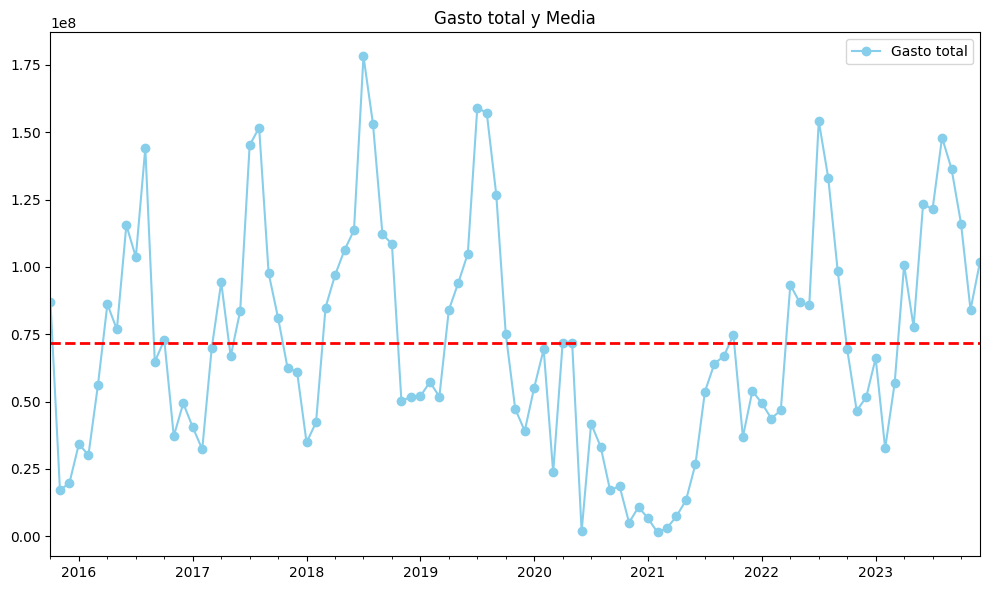

In [35]:
# Crea un gráfico de líneas para 'GASTO_TOTAL'
plt.figure(figsize=(10, 6))  # Ajusta el tamaño según tus necesidades
df1['Gasto total'].plot(kind='line', color='skyblue', marker='o', linestyle='-')

# Dibuja una línea horizontal en la media
plt.axhline(media_gasto_total, color='red', linewidth=2, linestyle='--')
# plt.legend(loc='upper right')
# Añade títulos y etiquetas
plt.title('Gasto total y Media')
plt.xlabel('')
plt.ylabel('')

# Muestra el gráfico
plt.tight_layout()
plt.show()


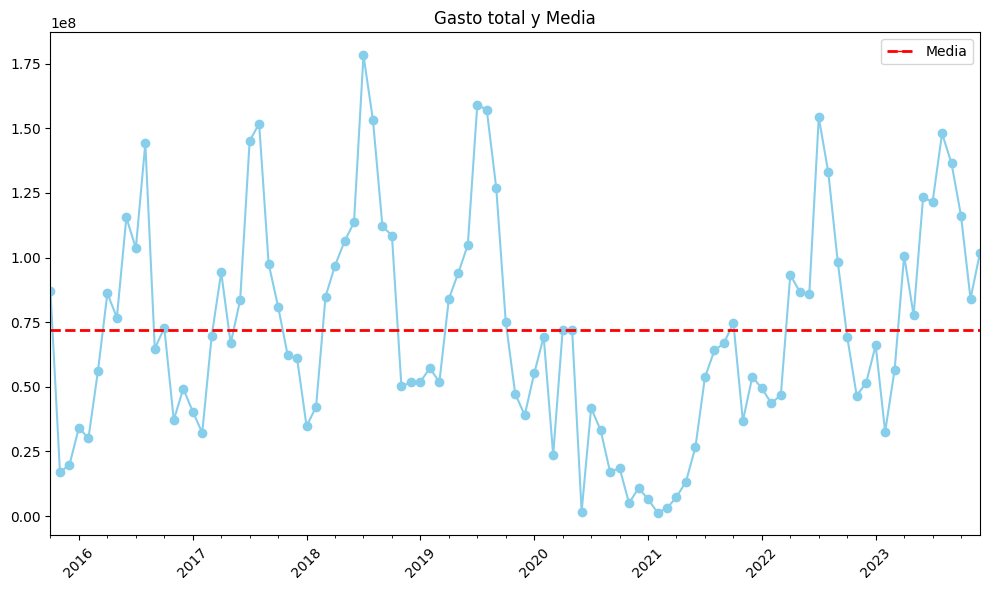

In [36]:
import matplotlib.lines as mlines

# Crea el gráfico de línea
plt.figure(figsize=(10, 6))
df1['Gasto total'].plot(kind='line', color='skyblue', marker='o', linestyle='-', label='Gasto total')

# Dibuja una línea horizontal para la media
plt.axhline(media_gasto_total, color='red', linewidth=2, linestyle='--')

# Crear un "proxy" para la leyenda de la línea de media
linea_media = mlines.Line2D([], [], color='red', marker='_', linestyle='--', linewidth=2, label='Media')

# Añade una leyenda incluyendo el proxy
plt.legend(handles=[linea_media], loc='upper right')

# Añade títulos y etiquetas
plt.title('Gasto total y Media')
plt.xlabel('')
plt.ylabel('')

# Rotar los xticks
plt.xticks(rotation=45)

# Ajusta el layout y muestra el gráfico
plt.tight_layout()
plt.show()


In [39]:
from matplotlib.ticker import FuncFormatter


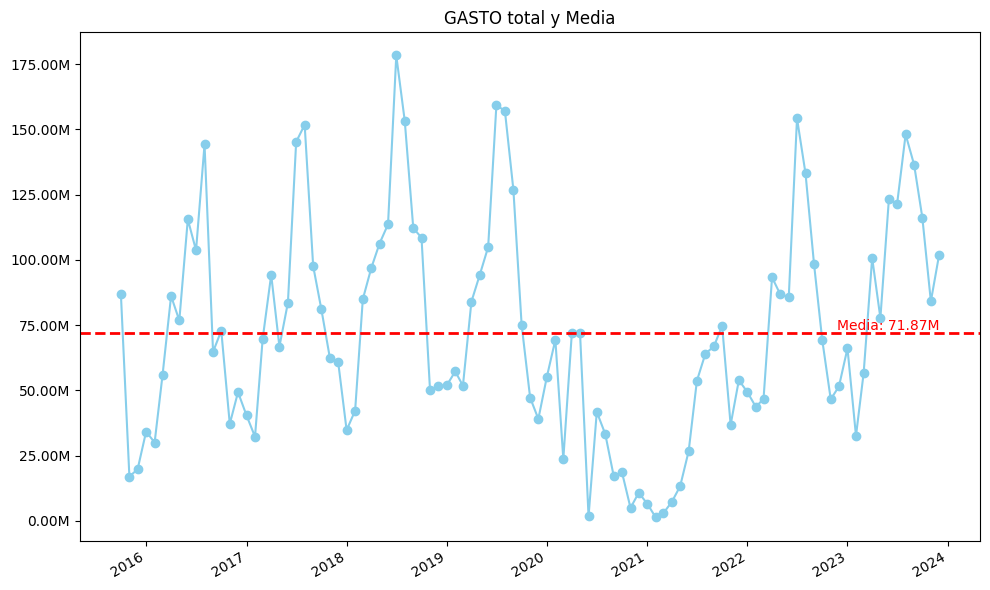

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['Gasto total'], marker='o', linestyle='-', color='skyblue')

# vamos a mejorar el gráfico graficando aparte de la línea de media, la leyenda encima de ella. 
# con esto podemos quitar la leyenda en la esquina del gráfico
plt.axhline(media_gasto_total, color='red', linewidth=2, linestyle='--')
plt.text(df1.index[-1], media_gasto_total, f'Media: {media_gasto_total/1e6:.2f}M', color='red', va='bottom', ha='right')

# Esta función formatea el eje Y para mostrar 'M' para millones
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))

# esto ajusta automáticamente las fechas del eje X para mejorar la legibilidad, hace falta eso sí, que esté en formato datetime
plt.gcf().autofmt_xdate()

plt.title('GASTO total y Media')
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()
plt.show()


In [43]:
# este código es más complejo que el anterior y sirve para básicamente lo mismo

# ### from matplotlib.ticker import FuncFormatter

# # Función para formatear el eje Y como "X.XXM"
# def millions(x, pos):
#     return '%1.2fM' % (x * 1e-6)

# # Asigna el formateador al eje Y
# formatter = FuncFormatter(millions)

# # Suponiendo que df es tu DataFrame de pandas
# # Asegúrate de que 'periodo' sea el índice y sea de tipo int o datetime si contiene años
# # df.set_index('periodo', inplace=True)

# # Calcula la media de GASTO_TOTAL
# gasto_total_media = df['GASTO_TOTAL'].mean()

# # Crea el gráfico de líneas para GASTO_TOTAL
# plt.figure(figsize=(12, 6))
# plt.plot(df.index, df['GASTO_TOTAL'], marker='o', linestyle='-', color='skyblue')

# # Añade la línea de la media
# plt.axhline(gasto_total_media, color='red', linestyle='--', label='Media')

# # Añade la etiqueta de la media
# plt.text(df.index[-1], gasto_total_media, ' Media', color='red', va='bottom', ha='right')

# # Formatea el eje Y
# plt.gca().yaxis.set_major_formatter(formatter)

# # Formatea el eje X si 'periodo' es el índice y está en el formato adecuado
# # Si el índice no está en el formato adecuado, puedes ajustar los ticks así:
# plt.xticks(ticks=range(df.index.min(), df.index.max() + 1), labels=range(df.index.min(), df.index.max() + 1))

# # Añade títulos y etiquetas
# plt.title('GASTO_TOTAL con Línea de Media')
# plt.xlabel('Periodo')
# plt.ylabel('Gasto Total (en millones)')

# # Muestra la leyenda
# plt.legend()

# # Ajusta el layout y muestra el gráfico
# plt.tight_layout()
# plt.show()


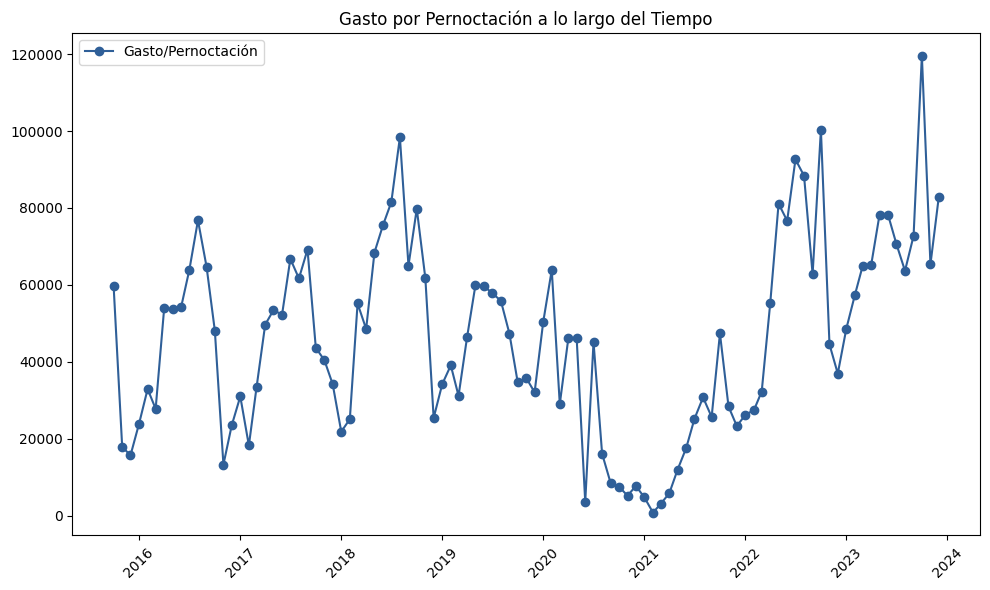

In [44]:
plt.figure(figsize=(10, 6))

plt.plot(df1.index, df1['Gasto/Pernoctación'], marker='o', linestyle='-', color='#2f5f98', label='Gasto/Pernoctación')

plt.legend()

plt.title('Gasto por Pernoctación a lo largo del Tiempo')
plt.xlabel('')
plt.ylabel('')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
### VAMOS A ENTRENAR SARIMAX para realizar este modelado

In [45]:
# primero hay que asegurarse de que el index es datetime. ya lo hicimos pasos atrás, pero si no:

df1.index = pd.to_datetime(df1.index).freq = 'MS'

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [47]:
# Ajustar el modelo SARIMAX
modelo = SARIMAX(df1['Gasto/Pernoctación'], 
                 order=(1, 1, 1),  # (p, d, q) para ARIMA
                 seasonal_order=(0, 0, 0, 0),  # Desactivar la parte estacional para el ejemplo
                 enforce_stationarity=False, 
                 enforce_invertibility=False)

resultados = modelo.fit()

c:\Users\Borja BOOTCAMP\onedrive\VIRTUAL_ENVS\CF_ML\ML_CF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Borja BOOTCAMP\onedrive\VIRTUAL_ENVS\CF_ML\ML_CF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [49]:
print(resultados.summary())

                               SARIMAX Results                                
Dep. Variable:     Gasto/Pernoctación   No. Observations:                   99
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1070.964
Date:                Tue, 13 Feb 2024   AIC                           2147.928
Time:                        13:18:31   BIC                           2155.621
Sample:                    10-01-2015   HQIC                          2151.038
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1899      0.368     -0.517      0.605      -0.910       0.531
ma.L1         -0.1421      0.386     -0.368      0.713      -0.899       0.615
sigma2      2.918e+08   7.03e-10   4.15e+17      0.0

In [ ]:
# tras observar estas variaciones, vamos a introducir la variable exógena, es decir, el período de COVID

In [50]:
# Marcamos el período del impacto del COVID-19
inicio_covid = '2020-03-01'

# Creamos la columna 'Impacto_COVID' con 0
df1['Impacto_COVID'] = 0

# Actualizamos 'Impacto_COVID' a 1 para el período afectado por COVID-19
df1.loc[df1.index >= inicio_covid, 'Impacto_COVID'] = 1

In [52]:
# Volvemos a entrenar el modelo con estas condiciones
modelo = SARIMAX(df1['Gasto/Pernoctación'], 
                 exog=df1[['Impacto_COVID']],
                 order=(1, 1, 1),  
                 seasonal_order=(0, 0, 0, 0),  
                 enforce_stationarity=False, 
                 enforce_invertibility=False)

resultados = modelo.fit()

print(resultados.summary())

                               SARIMAX Results                                
Dep. Variable:     Gasto/Pernoctación   No. Observations:                   99
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1069.902
Date:                Tue, 13 Feb 2024   AIC                           2147.804
Time:                        13:32:06   BIC                           2158.061
Sample:                    10-01-2015   HQIC                          2151.950
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Impacto_COVID -3.489e+04   4.12e+04     -0.847      0.397   -1.16e+05    4.59e+04
ar.L1            -0.2115      0.389     -0.543      0.587      -0.975       0.552
ma.L1            -0.0887      0.413     

c:\Users\Borja BOOTCAMP\onedrive\VIRTUAL_ENVS\CF_ML\ML_CF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Borja BOOTCAMP\onedrive\VIRTUAL_ENVS\CF_ML\ML_CF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


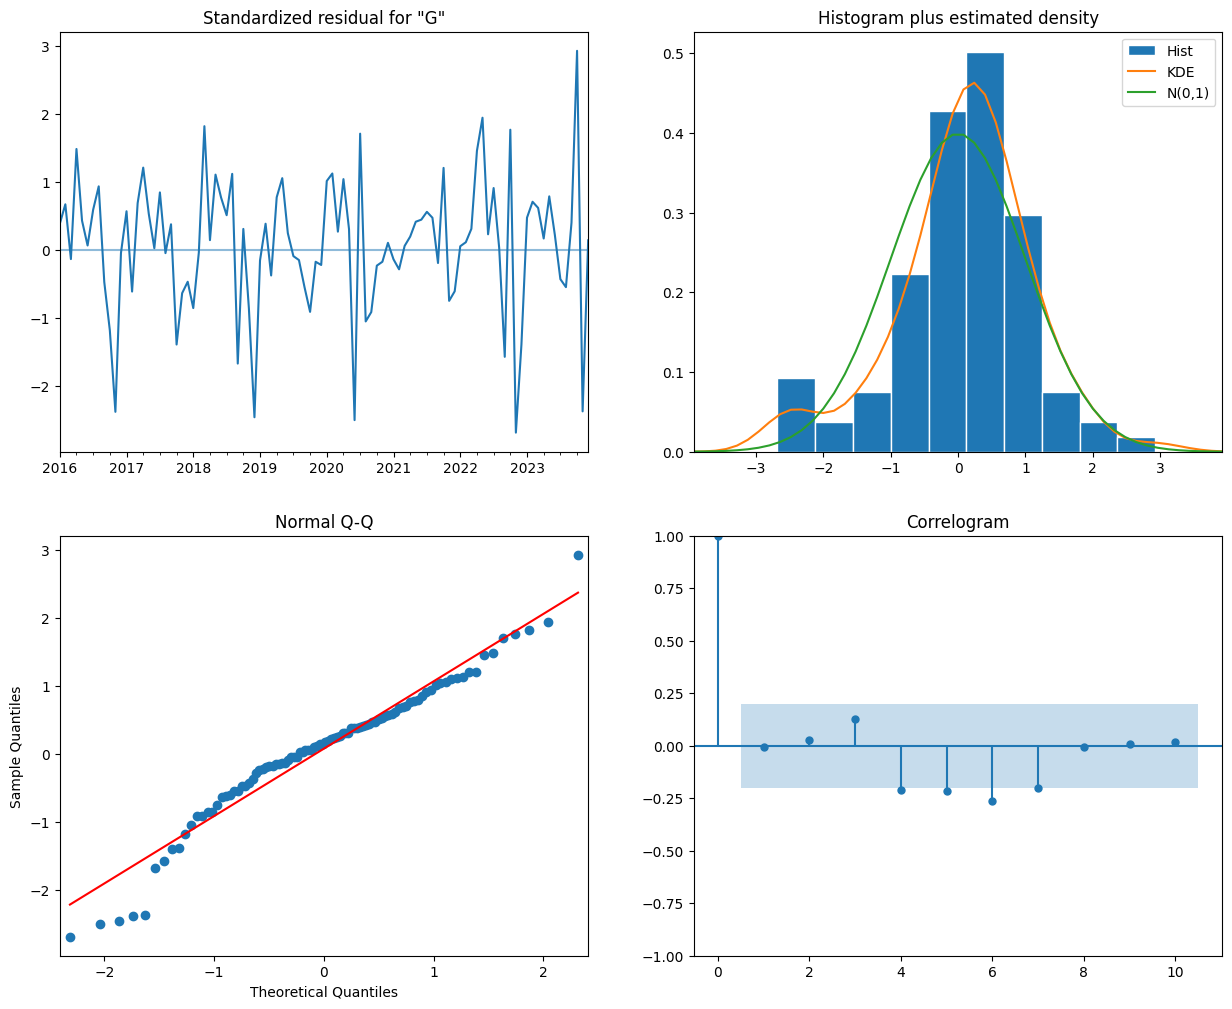

In [53]:
# vamos a graficar los resultados, primero de la prueba
resultados.plot_diagnostics(figsize=(15, 12))
plt.show()

In [54]:
prediccion = resultados.get_forecast(steps=12)  # Pronosticar 12 meses
pred_conf = prediccion.conf_int()  # establecemos intervalos de confianza


plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['Gasto/Pernoctación'], label='Datos Observados')
plt.plot(prediccion.predicted_mean.index, prediccion.predicted_mean, label='Predicción', color='red')
plt.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='pink')
plt.legend()
plt.show()


ValueError: Out-of-sample operations in a model with a regression component require additional exogenous values via the `exog` argument.

In [55]:
# Suponiendo que el impacto de COVID-19 continúa para todos los periodos futuros
# Puedes ajustar esto basado en tus expectativas o análisis
valores_exogenos_futuros = pd.DataFrame({'Impacto_COVID': [1] * 12})


In [56]:
prediccion = resultados.get_forecast(steps=12, exog=valores_exogenos_futuros)
pred_conf = prediccion.conf_int()


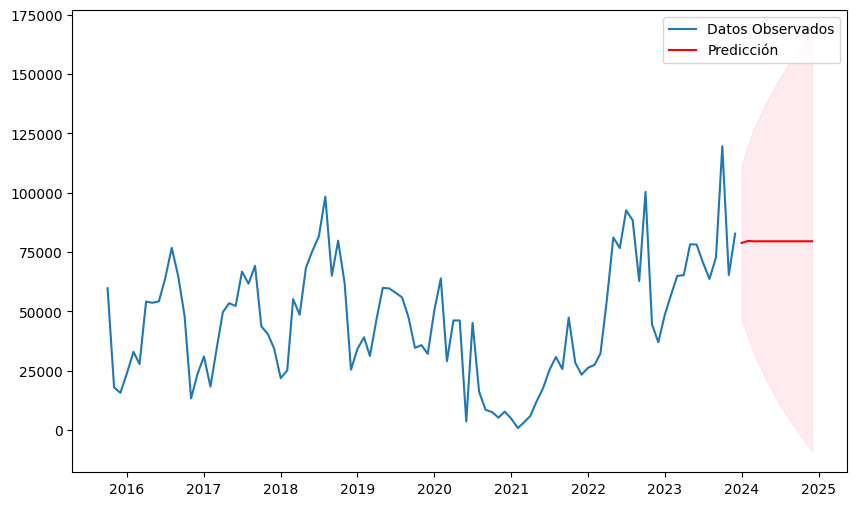

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['Gasto/Pernoctación'], label='Datos Observados')
plt.plot(prediccion.predicted_mean.index, prediccion.predicted_mean, label='Predicción', color='red')
plt.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()
